In [1]:
%cd /content/drive/MyDrive/딥러닝

/content/drive/MyDrive/딥러닝


### 목표
- 이미지 데이터를 분류하는 딥러닝 모델 설계 해보기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [3]:
# 데이터 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# X_train: 60000장의 데이터, 1장당 28 * 28

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

np.uint8(5)

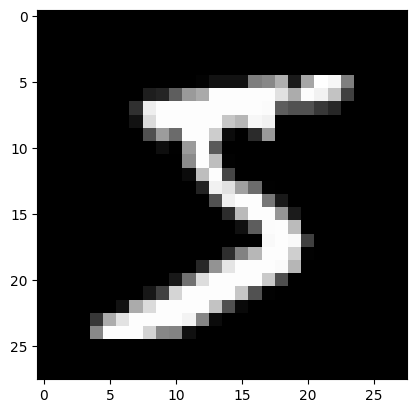

In [5]:
# 문제데이터 1ea 확인
# 정답데이터 1ea 확인
plt.imshow(X_train[0], cmap="gray")
y_train[0]

In [6]:
np.unique(y_train)  # 총 10개의 클래스

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [7]:
X_train[0][0][0]
# 0: 검정색
# 255: 흰색

np.uint8(0)

### MLP 모델링

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten

# Flatten: 다차원의 구조를 1차원으로 변경( Dense가 1차원만 입력으로 허용하기 때문)

In [9]:
# 신경망 구조 설계
model = Sequential()

# 입력층
model.add(InputLayer(shape = (28, 28)))

# 중간층
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

# 출력층
model.add(Dense(10, activation='softmax'))

In [10]:
# 학습 방법 설정
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

In [11]:
# 학습
h = model.fit(X_train, y_train, validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6813 - loss: 1.6741 - val_accuracy: 0.8984 - val_loss: 0.3560
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9160 - loss: 0.2965 - val_accuracy: 0.9355 - val_loss: 0.2315
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9396 - loss: 0.2121 - val_accuracy: 0.9437 - val_loss: 0.2036
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9484 - loss: 0.1782 - val_accuracy: 0.9465 - val_loss: 0.1956
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9527 - loss: 0.1629 - val_accuracy: 0.9516 - val_loss: 0.1745
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9601 - loss: 0.1379 - val_accuracy: 0.9550 - val_loss: 0.1740
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9622 - loss: 0.1300 - val_accuracy: 0.9550 - val_loss: 0.1723
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9662 - loss: 0.1206 -

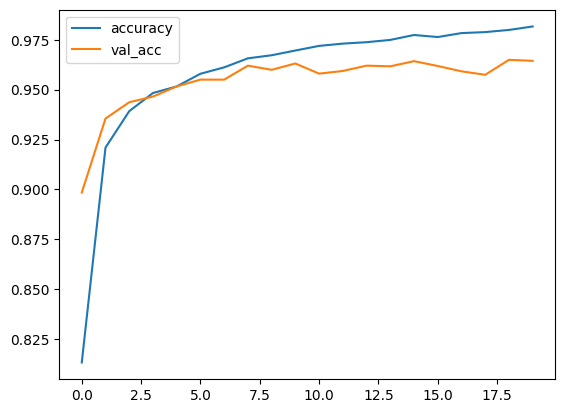

In [12]:
# 학습 결과 시각화
plt.plot(h.history['accuracy'], label = "accuracy")
plt.plot(h.history['val_accuracy'], label = "val_acc")

plt.legend()  # 범례 표시

plt.show()

### Callback 함수
- 모델 저장(ModelCheckpoint)
- 조기 학습 중단(EarlyStopping)

In [13]:
# 저장 된 모델 불러오기
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model.save("./data/hand_model.keras")  # 가중치파일저장

loaded_model = load_model("./data/hand_model.keras")
loaded_model.predict(X_test)[1].argmax()

# 1. 모델 저장 경로 및 파일명 저장
model_path = "./data/hand_model-{epoch:03d}-{val_accuracy:.4f}.keras"

# 2. 기능 생성
model_checkpoint_callback = ModelCheckpoint(filepath=model_path,       # 경로 및 파일명
                monitor="val_accuracy",    # 나아진 걸 판단하는 기준
                save_best_only=True,       # 나아진 결과에 대해서만 저장
                verbose=1)                 # 과정 출력

# 검증정확도가 5번의 에포크동안 개선되지 않으면 학습을 중단
early_stop_callback = EarlyStopping(monitor = 'val_accuracy', patience=5)
# 신경망 구조 설계
model = Sequential()

# 입력층
model.add(InputLayer(shape = (28, 28)))

# 중간층
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))

# 출력층
model.add(Dense(10, activation='softmax'))

# 학습 방법 설정
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=["accuracy"])

# 학습
h = model.fit(
              X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=50,
              callbacks=[model_checkpoint_callback, early_stop_callback]
              )

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Epoch 1/50
1857/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7062 - loss: 1.4205
Epoch 1: val_accuracy improved from -inf to 0.92470, saving model to ./data/hand_model-001-0.9247.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7075 - loss: 1.4124 - val_accuracy: 0.9247 - val_loss: 0.2612
Epoch 2/50
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9276 - loss: 0.2553
Epoch 2: val_accuracy improved from 0.92470 to 0.93640, saving model to ./data/hand_model-002-0.9364.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9276 - loss: 0.2552 - val_accuracy: 0.9364 - val_loss: 0.2207
Epoch 3/50
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9442 - loss: 0.1993
Epoch 3: val_accuracy improved from 0.93640 to 0.95120, saving model to ./data/hand_model-003-0.9512.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9442 - loss: 0.1993 - val_accuracy: 0.9512 - val_loss: 0.1655
Epoch 4/50
1875/1875

In [14]:
# 학습결과가 좋았던 모델 불러오기
loaded_model2 = load_model("./data/hand_model-014-0.9686.keras")

In [15]:
loaded_model2.predict(X_test)[0].argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(7)

In [16]:
# 사진 불러오기
import PIL.Image as pimg

img = pimg.open("./data/내가만든손글씨.gif")

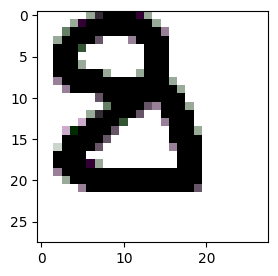

In [17]:
plt.figure(figsize=(3,3))
plt.imshow(img)
plt.show()

# 우리가 쓴 손글씨는 흰색배경에 검은색 글씨
# 학습 시켰던 데이터는 검은색배경에 흰색 글씨

In [64]:
# 픽셀값 조정을 위해 형변환
num = np.array(img)
# 흰색   -> 255  -> 0으로 만들어야함
# 검은색 -> 0    -> 255으로 만들어야함
print(255-num[0][0])
print(255-num[15][15])
num = 255 -num
# num차원 변환
num = num.reshape(1, 28, 28)
num.shape
loaded_model2.predict(num)[0].argmax()

4
4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


np.int64(5)

### CNN(Convolution Neural Network, 합성곱 신경망)

- 합성곱 연삽을 통해서 특징 찾기 → 찾아둔 특징을 활용

In [45]:
# CNN 모델 생성하기 위한 도구 불러오기
from tensorflow.keras import Sequential  # 뼈대
from tensorflow.keras.layers import InputLayer, Dense, Flatten, Conv2D, MaxPooling2D

# Conv2D: 특징 추출부의 구성요소의 중 1ea, 특징을 찾는 역할
# MaxPooling2D: 특징추출부의 구성요소 중 1ea, 필요한 정보만 걸러내는 역할

In [55]:
# 1. 신경망 구조 설계

# 뼈대
cnn_model = Sequential()

# 입력층
cnn_model.add(InputLayer(shape=(28,28,1)))  # 데이터 모양 정의

# 특징추출부
cnn_model.add(Conv2D(filters = 32,                  # 커널의 갯수 지정
                     kernel_size=(3,3),             # 커널의 사이
                     activation='relu',             # 활성화 함수 정의 ReLu
                     padding = "same"))             # 이미지 자체가 작거나, 가장 자리에 중요한 정보가 있는 경우-> same 활용
                                                    # 이미지 자체가 너무 큰 경우(특징이 많이 잡힐 때) → valid활용
                    #  strides=(2,2)))              # 커널의 보폭, 불필요한 정보 제거

cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# 특징추출부
cnn_model.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu',padding = "same"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu',padding = "same"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu',padding = "same"))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

# ConV + Pooling
# ConV + Conv + Pooling


# 분류부(출력층)
# 현재 ConV층과 MaxPooling층->2차원
# 분류기 MLP에서 이 데이터를 완벽하게 받을 수 있도록 1차원 변환 필요
cnn_model.add(Flatten())  # 앞의 2차원 데이터를 1차원으로 변환
# 분류기 구현
cnn_model.add(Dense(units=512, activation='relu'))
cnn_model.add(Dense(units=10, activation='softmax'))

In [56]:
# 봉균st
# 정답 데이터 원핫 인코딩 미진행 / 손실함수: sparse_categorical_crossntropy: 원핫 인코딩 진행할 필요가 없다
# 규남st
# 정답 데이터 원핫 인코딩 진행 / 손실함수: categorical_crossntropy
# 정답 데이터 원핫 인코딩 진행

# 1. pd.get_dummies(data, dtype=int)
# 2. (텐서플로우) to_categorical() - 이거쓸거임

# 원핫 인코딩 도구 불러오기
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_test_oh  = to_categorical(y_test)

# 실제로 계산 수식에 차이가 없음 - 정확도도 차이가 없음

In [62]:
# 모델 컴파일
cnn_model.compile(
    loss = 'categorical_crossentropy',  # 원핫 인코딩한 데이터를 사용하기에 sparse 사용하지 않음
    optimizer = 'adam',
    metrics = ['accuracy']
    )

In [63]:
cnn_model.fit(X_train, y_train_oh,
              epochs=30,
              validation_split = 0.2,
              )

Epoch 1/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9965 - loss: 0.0199 - val_accuracy: 0.9879 - val_loss: 0.1023
Epoch 2/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9960 - loss: 0.0200 - val_accuracy: 0.9852 - val_loss: 0.1299
Epoch 3/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9957 - loss: 0.0233 - val_accuracy: 0.9858 - val_loss: 0.1309
Epoch 4/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9972 - loss: 0.0149 - val_accuracy: 0.9875 - val_loss: 0.1035
Epoch 5/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9969 - loss: 0.0160 - val_accuracy: 0.9898 - val_loss: 0.0996
Epoch 6/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9980 - loss: 0.0116 - val_accuracy: 0.9893 - val_loss: 0.1140
Epoch 7/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9972 - loss: 0.0166 - val_accuracy: 0.9835 - val_loss: 0.1656
Epoch 8/30
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9968 - loss: 0.0176

In [ ]:
# 픽셀값 조정을 위해 형변환
num = np.array(img)
# 흰색   -> 255  -> 0으로 만들어야함
# 검은색 -> 0    -> 255으로 만들어야함
print(255-num[0][0])
print(255-num[15][15])
num = 255 -num
# num차원 변환
num = num.reshape(1, 28, 28)
num.shape
loaded_model2.predict(num)[0].argmax()